# Big Mart Data Analysis (EDA).
### Objective:
- Main Objective to analyze this dataset is to finding the various hidden patterns and extract critical insights which may lead to game changing decission for better future.

## Steps for EDA Analysis
>### Importing Libraries and Dataset
- Importing various libraries is the very first towards the Exploratory Data Analysis with any dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('big_mart.csv')
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


>### Data Cleaning
- This is first and most critical part for Accurate and meaningful insights which mainly involved in...
  - Cheaking head for the basic understanding about the dataset
  - Cheaking for Uninque values with similar meaning
  - Cheaking for null values
  - Understanding various datatype present in the datset using info() 
  - Apart from these their are many more steps like 
     - using round to round up the numerical data
     - replace
     - fillna etc


In [4]:
df.drop(columns=['Outlet_Establishment_Year'],inplace=True)
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
df['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}, inplace=True)

C:\Users\rabiu\AppData\Local\Temp\ipykernel_23008\3473101395.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}, inplace=True)


In [7]:
df.isnull().sum()/len(df)*100

Item_Identifier          0.000000
Item_Weight             17.165317
Item_Fat_Content         0.000000
Item_Visibility          0.000000
Item_Type                0.000000
Item_MRP                 0.000000
Outlet_Identifier        0.000000
Outlet_Size             28.276428
Outlet_Location_Type     0.000000
Outlet_Type              0.000000
Item_Outlet_Sales        0.000000
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           6113 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 732.6+ KB


In [9]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [10]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [11]:
df['Item_MRP']=round(df['Item_MRP'])
df['Item_MRP']=df['Item_MRP'].astype(int)

In [12]:
df['Item_Weight']=round(df['Item_Weight'])

In [13]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [14]:
df['Item_Type'].replace({'Dairy':'Fresh Food','Meat':'Fresh Food','Fruits and Vegetables':'Fresh Food','Seafood':'Fresh Food','Baking Goods':'Packaged Food','Canned':'Packaged Food',
'Snack Foods':'Packaged Food','Frozen Foods':'Packaged Food','Breakfast':'Packaged Food','Seafood':'Packaged Food','Breads':'Packaged Food','Starchy Foods':'Packaged Food',
'Soft Drinks':'Beverages','Hard Drinks':'Beverages','Health and Hygiene':'Household','Others':'Household'},inplace=True)

C:\Users\rabiu\AppData\Local\Temp\ipykernel_23008\4021118753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Type'].replace({'Dairy':'Fresh Food','Meat':'Fresh Food','Fruits and Vegetables':'Fresh Food','Seafood':'Fresh Food','Baking Goods':'Packaged Food','Canned':'Packaged Food',


In [15]:
df['Item_Type'].unique()

array(['Fresh Food', 'Beverages', 'Household', 'Packaged Food'],
      dtype=object)

In [16]:
df['Item_Outlet_Sales']=round(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].astype(int)
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,7.0,Low Fat,0.056783,Packaged Food,215,OUT013,High,Tier 3,Supermarket Type1,2778
8519,FDS36,8.0,Regular,0.046982,Packaged Food,108,OUT045,Medium,Tier 2,Supermarket Type1,549
8520,NCJ29,11.0,Low Fat,0.035186,Household,85,OUT035,Small,Tier 2,Supermarket Type1,1193
8521,FDN46,7.0,Regular,0.145221,Packaged Food,103,OUT018,Medium,Tier 3,Supermarket Type2,1846
8522,DRG01,15.0,Low Fat,0.044878,Beverages,75,OUT046,Small,Tier 1,Supermarket Type1,766


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   int32  
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   int32  
dtypes: float64(2), int32(2), object(7)
memory usage: 666.0+ KB


In [18]:
df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [19]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Visualization of Data
Visualization of the cleaned data is the next step towards EDA for the better and easy undersatnding of the complex data

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Item_MRP'>

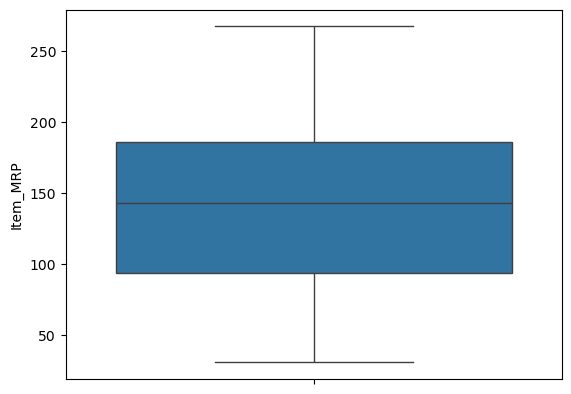

In [21]:
sns.boxplot(df['Item_MRP'])

->> Outliers basically cheaked on the numerical values to identify the value which may affect the whole mean of the dataset which eventually lead to inaccurate data analysis

<Axes: ylabel='Item_Outlet_Sales'>

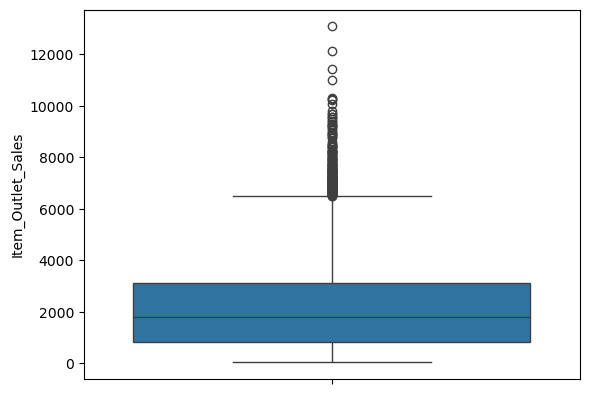

In [22]:
sns.boxplot(df['Item_Outlet_Sales'])

>### Total Sales by Item Type (Barplot)
Here I have analyze the total sales by using groupby function of 'Item_Type' and 'Item_Outlet_Sales' 

C:\Users\rabiu\AppData\Local\Temp\ipykernel_23008\326661423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=sales_by_Item_Type,palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

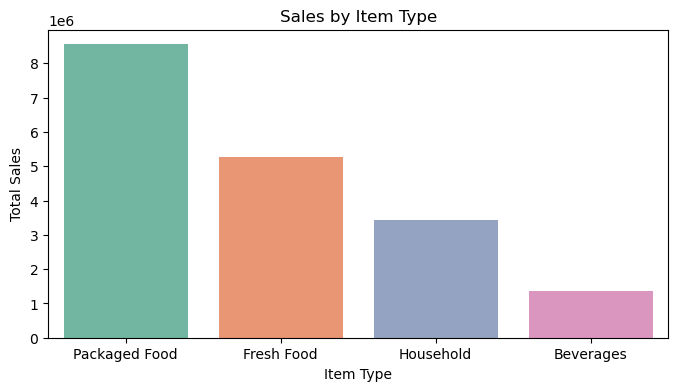

In [23]:
plt.figure(figsize=(8,4))
sales_by_Item_Type=round(df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False))
ax=sns.barplot(data=sales_by_Item_Type,palette='Set2')
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show

- Result : We cam see that 'Food' is the most selling category among others where 'Packaged Food' topping the list, packaged food include 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast' etc 

In [24]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.0,Low Fat,0.016047,Fresh Food,250,OUT049,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,6.0,Regular,0.019278,Beverages,48,OUT018,Medium,Tier 3,Supermarket Type2,443


>### Sale Analysis on MRP (Countplot)
To analyse this section I needed to manupulate the dataset by creating 'MRP_Category' column in dataframe, to create this column following step are require..
  - Creating Bins size
  - Giving Data label to the bins
  - Using 'cut' function

In [25]:
bins=[0,50,100,200,float('inf')]
label=['Under_50','50_100','101_200','Above_200']
df['MRP_category']=pd.cut(df['Item_MRP'],bins=bins,labels=label,right=True)
op=df[['Item_MRP','MRP_category']].head()

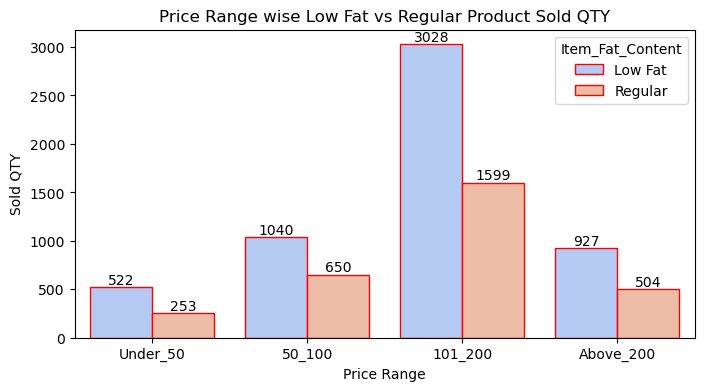

In [26]:
plt.figure(figsize=(8,4))
ax=sns.countplot(data=df,
x='MRP_category',
hue='Item_Fat_Content',
palette='coolwarm',
edgecolor='red')
plt.title('Price Range wise Low Fat vs Regular Product Sold QTY')
plt.xlabel('Price Range')
plt.ylabel('Sold QTY')
plt.show
for bars in ax.containers:
    ax.bar_label(bars)

- Result : We can see that product with lower price range is the least seling categories where product with Upper Mid ranges are more prefferable to the consumer wheather it Low fat or Regular product which clearly tells that quality is matter to consumers over quantity.

C:\Users\rabiu\AppData\Local\Temp\ipykernel_23008\1717275902.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_cat_sale=df.groupby('MRP_category')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
C:\Users\rabiu\AppData\Local\Temp\ipykernel_23008\1717275902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=price_cat_sale,


Text(0, 0.5, 'Sales Amount')

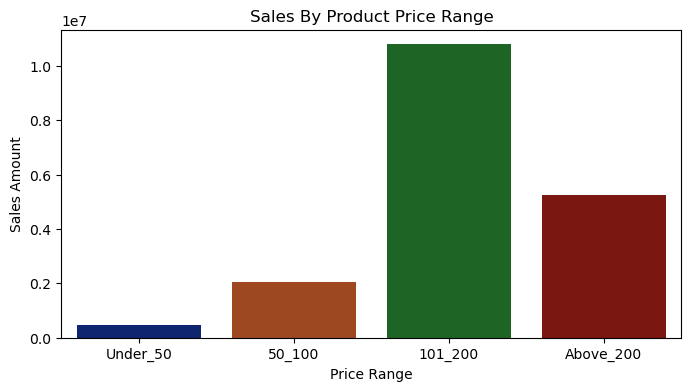

In [27]:
plt.figure(figsize=(8,4))
price_cat_sale=df.groupby('MRP_category')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
ax=sns.barplot(data=price_cat_sale,
estimator=sum,
palette='dark')
plt.title('Sales By Product Price Range')
plt.xlabel('Price Range')
plt.ylabel('Sales Amount')

> #### Sales Comparison Low Fat vs Regular (Pieplot)

<function matplotlib.pyplot.show(close=None, block=None)>

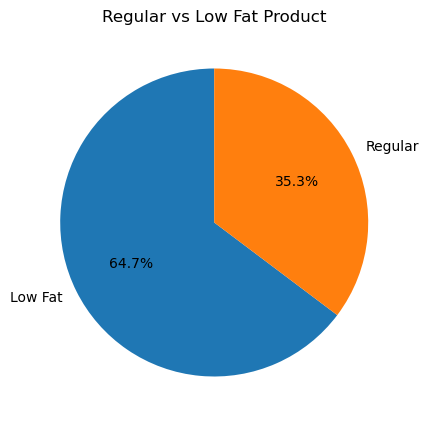

In [28]:
plt.figure(figsize=(5,5))
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Regular vs Low Fat Product')
plt.show

- Result : As expected product with low fat content is more prefferable to the consumers which indicate health matter the most for the most of the consumers 
.

>#### Outlet Sales Performance (Barplot)

<function matplotlib.pyplot.show(close=None, block=None)>

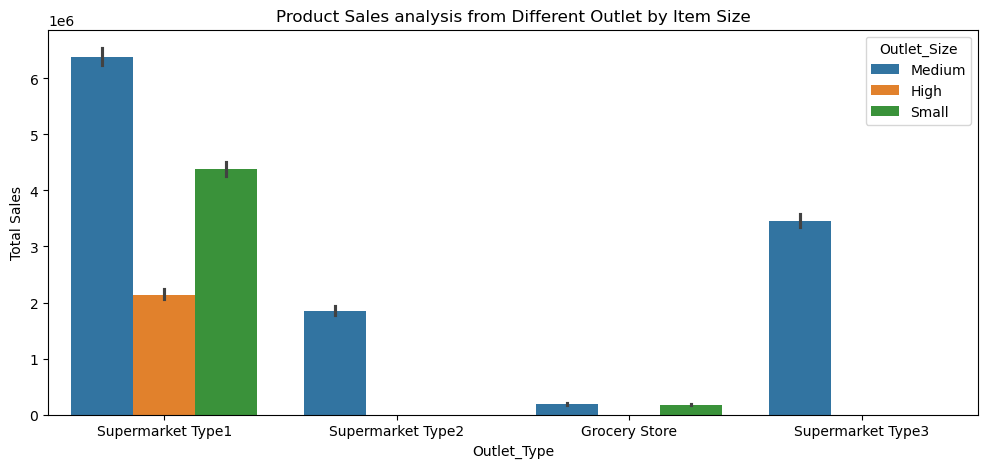

In [29]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df,
x='Outlet_Type',
y='Item_Outlet_Sales',
hue='Outlet_Size',
estimator=sum)
plt.title('Product Sales analysis from Different Outlet by Item Size')
plt.ylabel('Total Sales')
plt.show

- Result : Here we can see that all size of product sales are coming from 'Supermarket Type1' mostly where all others record are not impressive at all.

>#### Outlet Sales Performance by Item Type (Barplot)

<function matplotlib.pyplot.show(close=None, block=None)>

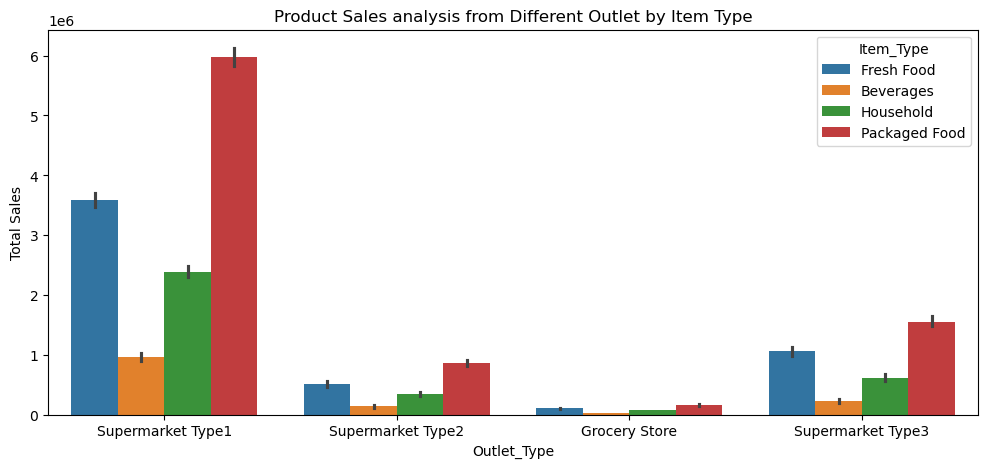

In [30]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=df,
x='Outlet_Type',
y='Item_Outlet_Sales',
hue='Item_Type',
estimator=sum)
plt.title('Product Sales analysis from Different Outlet by Item Type')
plt.ylabel('Total Sales')
plt.show

- Result : 'Packaged Food' is most selling product in all outlet and most of the Item are sold in 'Supermarket Type1'

>#### Tier wise Sales Performance (Barplot)

<function matplotlib.pyplot.show(close=None, block=None)>

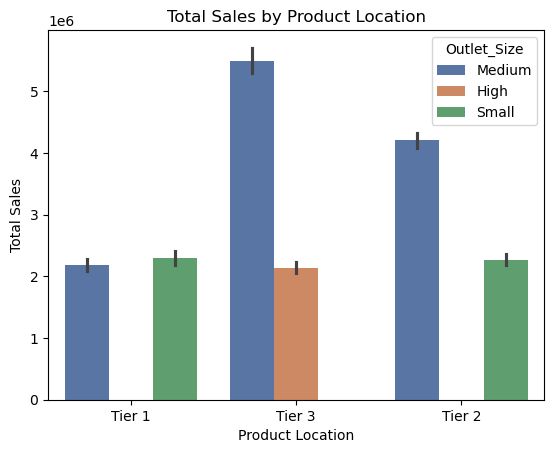

In [31]:
ax=sns.barplot(data=df,
x='Outlet_Location_Type',
y='Item_Outlet_Sales',
estimator=sum,
hue='Outlet_Size',
palette='deep')
plt.title('Total Sales by Product Location')
plt.xlabel('Product Location')
plt.ylabel('Total Sales')
plt.show

- Result : All the tiers perform well for medium size product but only Tier3 have sold the High size product 

>#### Building Relationship (Heatmap)

<Axes: >

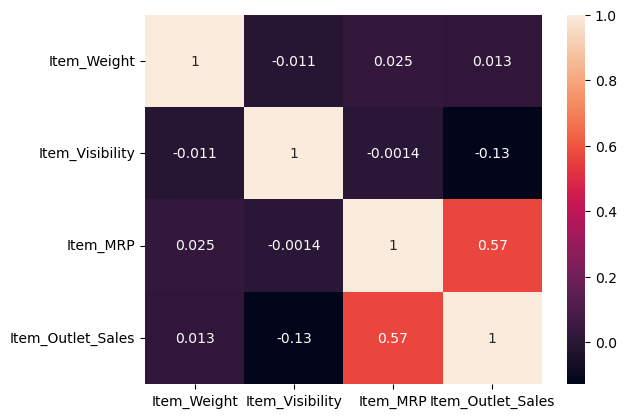

In [32]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

- Result : Here we can identify that with increasing of Item Price, Item Outlet Sales also increases so this is the critical insight from here

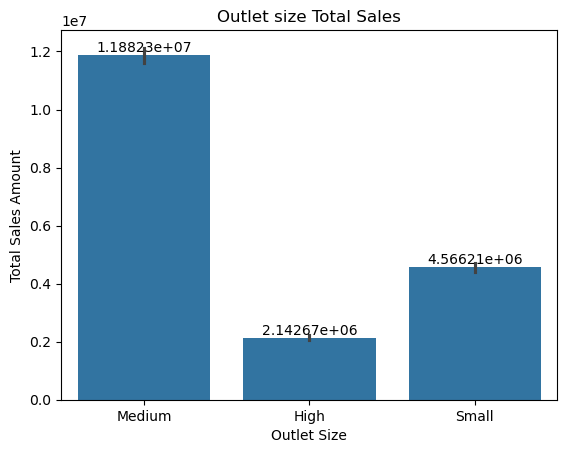

In [33]:
ax=sns.barplot(data=df,
y='Item_Outlet_Sales',
x='Outlet_Size',
estimator=sum)
plt.title('Outlet size Total Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales Amount')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\rabiu\AppData\Local\Temp\ipykernel_23008\4276708238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df,


<function matplotlib.pyplot.show(close=None, block=None)>

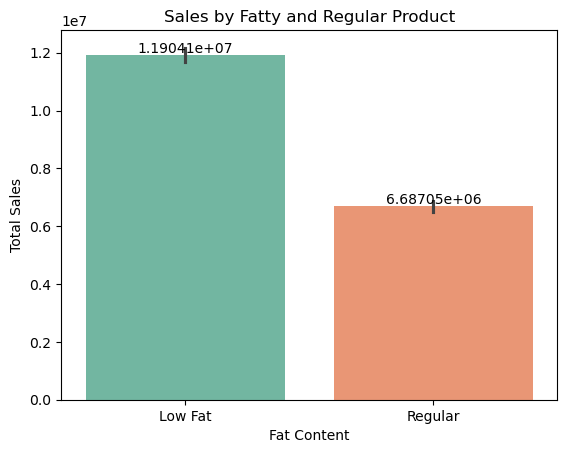

In [34]:
ax=sns.barplot(data=df,
x='Item_Fat_Content',
y='Item_Outlet_Sales',
palette='Set2',
estimator=sum)
plt.title('Sales by Fatty and Regular Product')
plt.xlabel('Fat Content')
plt.ylabel('Total Sales')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

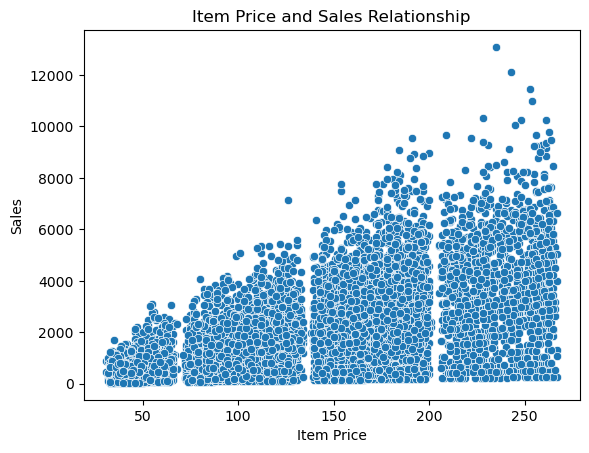

In [ ]:
ax=sns.scatterplot(data=df,
x='Item_MRP',
y='Item_Outlet_Sales')
plt.title('Item Price and Sales Relationship')
plt.xlabel('Item Price')
plt.ylabel('Sales')
plt.show

### `Key Insights` 
After analysing the dataset we can finally conlude the following critical points..
  - 'Packaged' Food is the most selling Food type.
  - '100-200' is the most popular price range for the most of the consumers
  - 'Superstore type1' is the top pertforming Outlet amongs the all.
  - Product with Low Fat Content is sold the most compare to others.
  - 'Medium' outlest size product is the most common choice to the consumers 